<font size=6><b>Bike Sharing Demand

<img src="./logo.png">
* ref : https://www.kaggle.com/competitions/bike-sharing-demand/data <br>
* ref : https://dacon.io/competitions/official/235985/data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

# Data Fields

<pre>
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

# Data Load

* 일반적으로 데이터 로드 시 날짜 처리를 하는게 일반적
    * <b> parse_dates=['datetime']  </b>
* 연습을 위해 object로 두고 변환해서 사용 예정

In [2]:
train = pd.read_csv("./train.csv")  #, parse_dates=['datetime'])

## 구조 확인 (3종)
* df.head()
* df.info()
* df.shape

In [3]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train.shape

(10886, 12)

## 컬럼명 변경
* datetime은 예약어 --> 변경해서 사용
* <font color=red><b>df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)

In [6]:
train.rename(columns = {'datetime' : 'regdate', 'count' : 'regcount'}, inplace = True)
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

In [7]:
# 문법연습 : 컬럼 소문자화
train.columns = train.columns.str.lower()
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

In [8]:
train.columns = ['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## 결측체크

In [9]:
train.isna().sum()

regdate       0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Object 체크

In [10]:
train.select_dtypes("object").columns

Index(['regdate'], dtype='object')

## regdate 타입 변환
* object(str) --> datetime 
* '2020-01-01' --->  datetime.datetime(2020, 1, 1) 

### (class) datetime 

In [11]:
from datetime import datetime

In [12]:
datetime.strptime('2020-12-14 20:12:59', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2020, 12, 14, 20, 12, 59)

In [13]:
datetime.fromisoformat('2020-12-14 20:12:59')

datetime.datetime(2020, 12, 14, 20, 12, 59)

### ★ pd.read_csv(..parse_dates=['컬럼'])

In [14]:
# train = pd.read_csv("./train.csv", parse_dates=['datetime'])

### ★ pd.to_datetime(df[컬럼])

In [15]:
train['regdate_datetype22'] = pd.to_datetime(train['regdate'])
train.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   regdate             10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  regdate_datetype22  10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8), ob

### ★ df[컬럼].astype('datetime64[ns]')

In [17]:
train['regdate_datetype33'] = train['regdate'].astype('datetime64[ns]')
train.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22,regdate_datetype33
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01 01:00:00


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   regdate             10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  regdate_datetype22  10886 non-null  datetime64[ns]
 13  regdate_datetype33  10886 non-null  datetime64

### apply(lambda x:) 

In [19]:
train['regdate_datetype44'] = train['regdate'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
train.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22,regdate_datetype33,regdate_datetype44
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01 01:00:00,2011-01-01 01:00:00


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   regdate             10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  regdate_datetype22  10886 non-null  datetime64[ns]
 13  regdate_datetype33  10886 non-null  datetime64

In [21]:
train['regdate']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: regdate, Length: 10886, dtype: object

### index로 넣기
* 머신러닝은 index 값은 학습에서 제외
* regdate를 index로 지정

In [22]:
train = train.set_index('regdate')
train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22,regdate_datetype33,regdate_datetype44
regdate,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01 01:00:00,2011-01-01 01:00:00


### index에서 빼내기

In [23]:
train = train.reset_index()

In [24]:
train.head(2)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,regdate_datetype22,regdate_datetype33,regdate_datetype44
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01 01:00:00,2011-01-01 01:00:00


# EDA

In [25]:
train = pd.read_csv("./train.csv", parse_dates=['datetime'])
test  = pd.read_csv("./test.csv", parse_dates=['datetime'])

In [26]:
# train.columns = ['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
#        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
train.rename(columns = {'datetime' : 'regdate', 'count' : 'regcount'}, inplace = True)
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

In [27]:
test.rename(columns = {'datetime' : 'regdate', 'count' : 'regcount'}, inplace = True)
test.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [30]:
train.head(1)

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [65]:
test.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,y,m,d,h
regdate,,,,,,,,,,,,
2011-01-20,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0


## target
* 'casual', 'registered', 'count'

In [32]:
train[  train['regcount'] == train['casual'] + train['registered']  ].shape

(10886, 12)

In [33]:
train.shape

(10886, 12)

## regdate : ymdh파생피쳐

In [34]:
train['regdate'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: regdate, dtype: datetime64[ns]

In [35]:
# train['y'] = datetime.today().year
train['y'] = train['regdate'].dt.year
train['m'] = train['regdate'].dt.month
train['d'] = train['regdate'].dt.day
train['h'] = train['regdate'].dt.hour

In [36]:
test['y'] = test['regdate'].dt.year
test['m'] = test['regdate'].dt.month
test['d'] = test['regdate'].dt.day
test['h'] = test['regdate'].dt.hour

In [37]:
train = train.set_index('regdate')
test  = test.set_index('regdate')

In [38]:
train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h
regdate,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


## 이산형 모든 피쳐

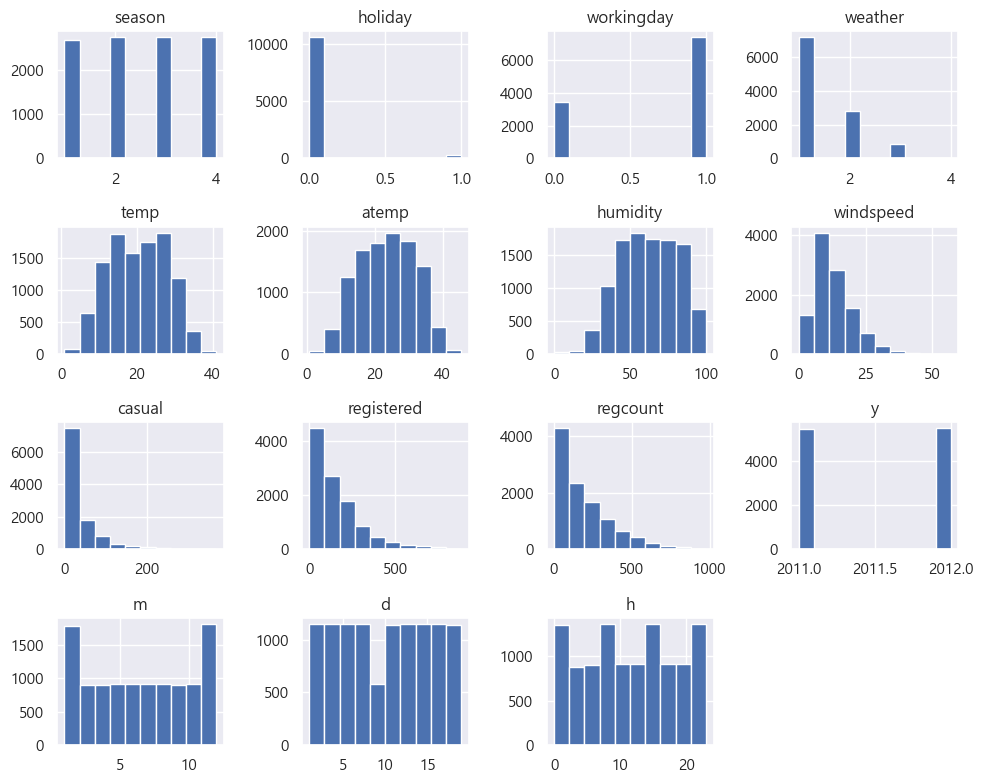

In [39]:
train.hist(figsize=(10, 8) )
plt.tight_layout()
plt.show()

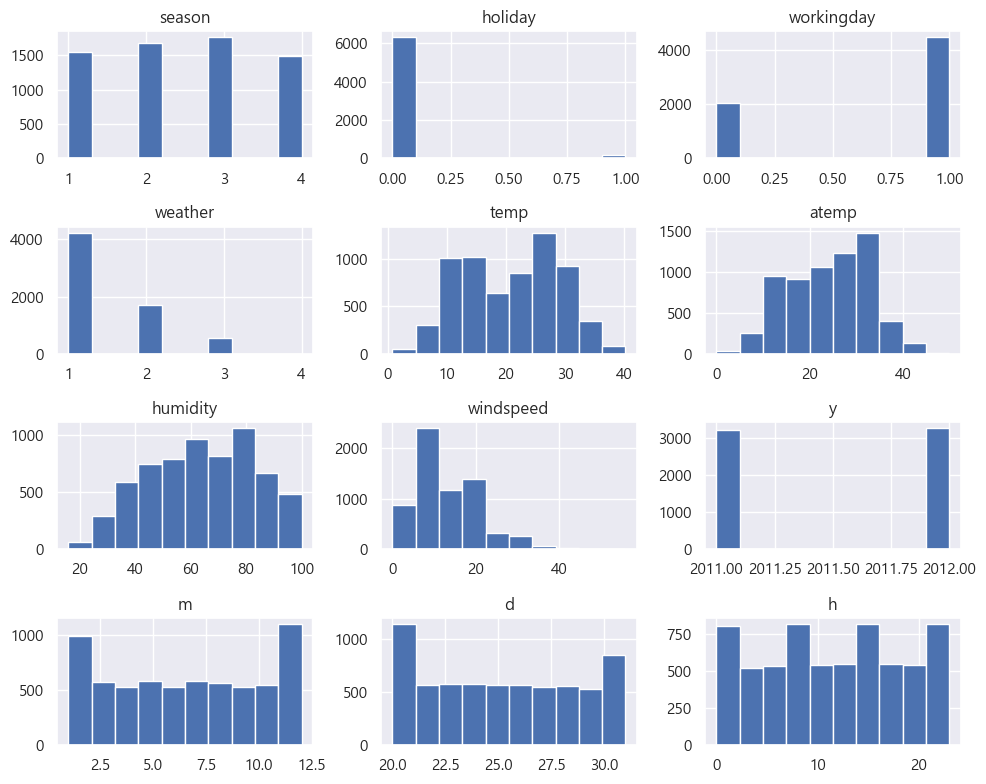

In [40]:
test.hist(figsize=(10, 8) )
plt.tight_layout()
plt.show()

In [41]:
# for i, col in enumerate(train.columns) :
#     r = i//4
#     c = i%4
#     print(i,r, c ,col)


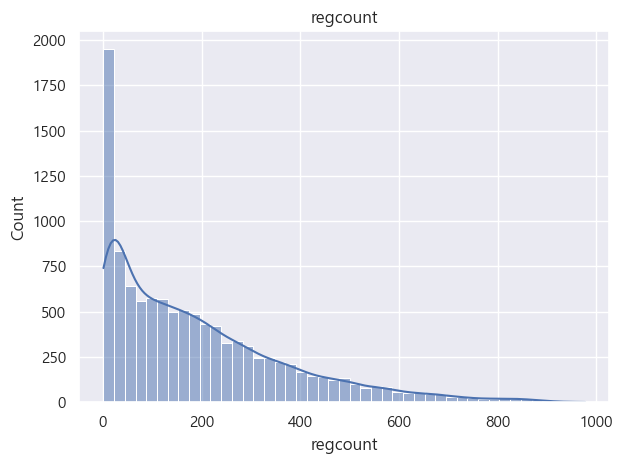

In [42]:
plt.title("regcount")
sns.histplot(data=train, x='regcount',   kde=True )
plt.tight_layout()
plt.show()

In [43]:
train.columns, len(train.columns)

(Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'casual', 'registered', 'regcount', 'y', 'm',
        'd', 'h'],
       dtype='object'),
 15)

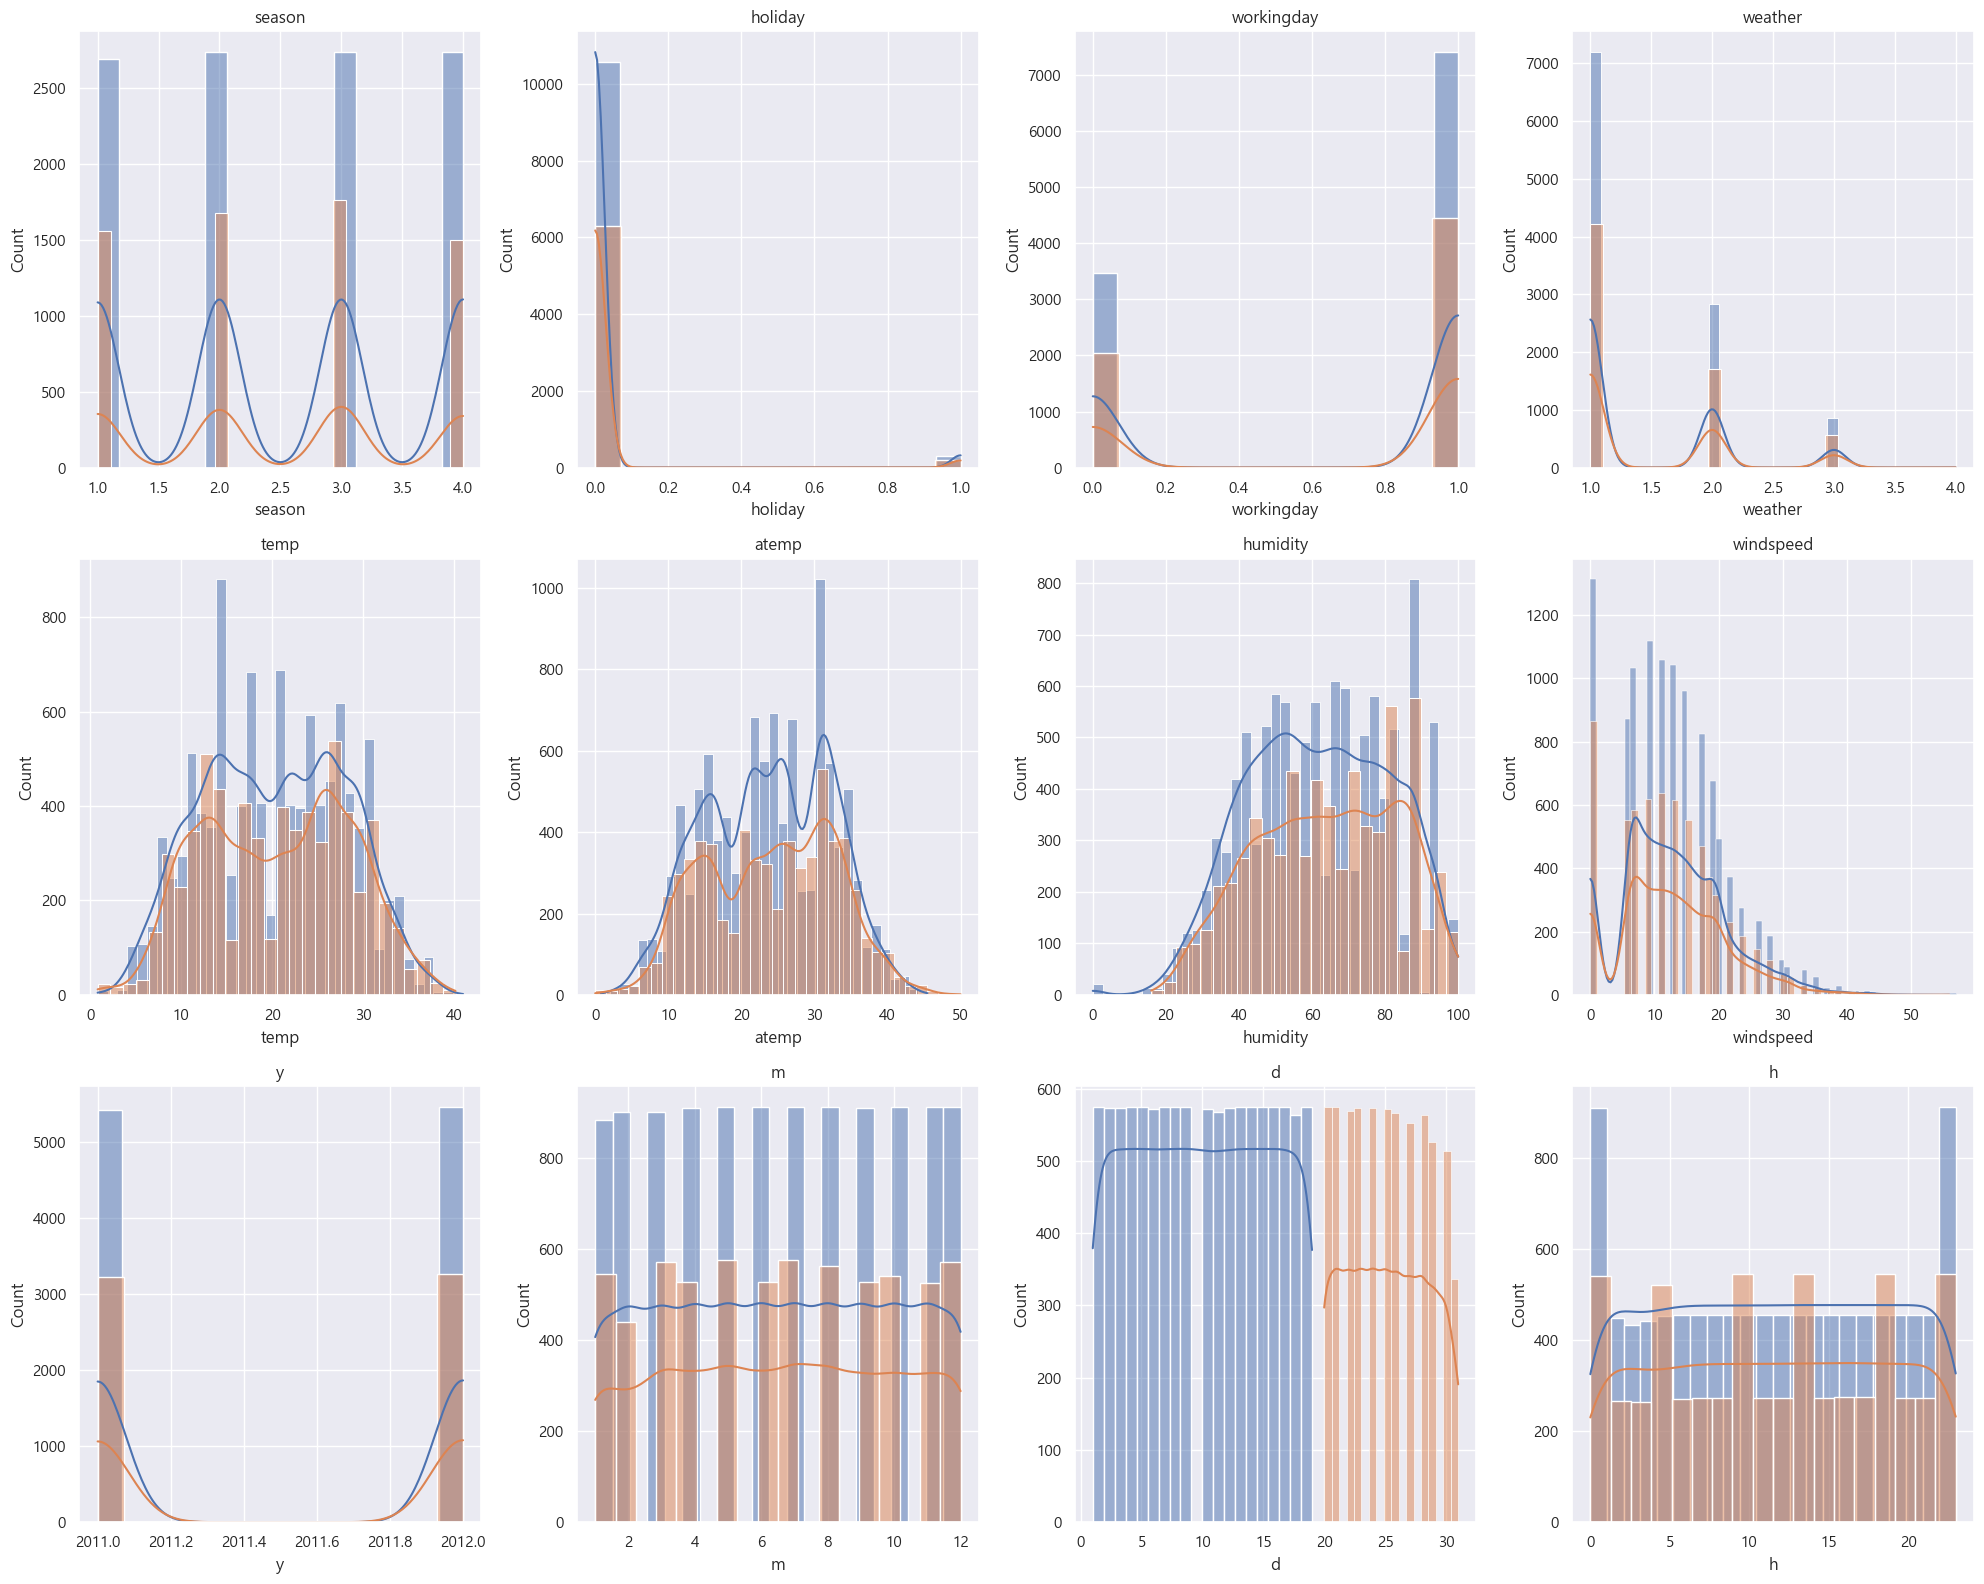

In [44]:
fig, axes = plt.subplots(3, 4, figsize=(20, 16)  ) 

col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','y', 'm', 'd','h']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test, x=col, ax=axes[r][c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

## 날짜 관련 피쳐
* ['season', 'y', 'm', 'd','h']
* countplot(), barplot()

* day를 버리고 week로 대체
* <font color=red><b>Datetime.dayofweek : 월요일(0), 일요일(6)

In [45]:
train['w'] = train.index.dayofweek

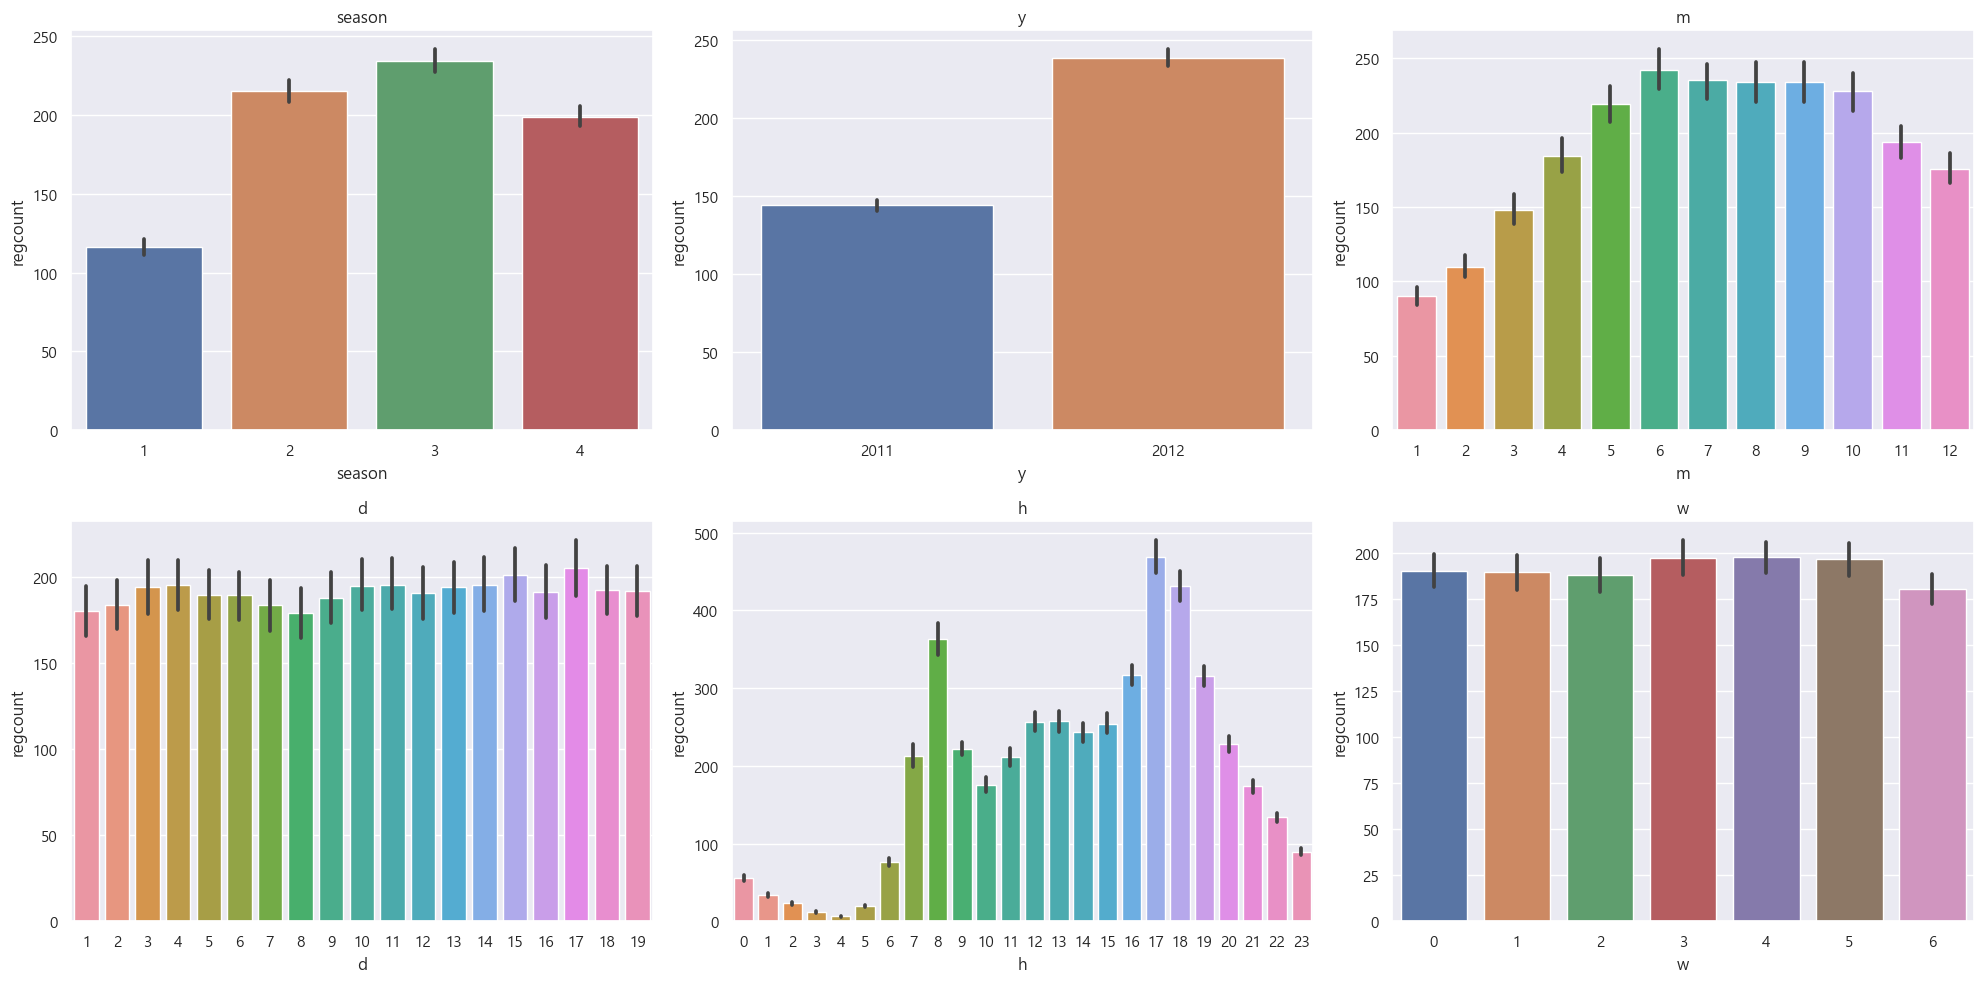

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10)  ) 

col_list = ['season', 'y', 'm', 'd','h','w']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//3
    c = i%3
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    # ---------------------------------------------------------------------------
    sns.barplot(data=train    , x=col, y="regcount", ax=axes[r][c])
    # sns.countplot(data=train, x=col           , ax=axes[r][c])
    # ---------------------------------------------------------------------------
plt.tight_layout()
plt.show()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: regcount, dtype: float64


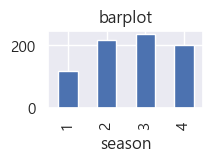

In [62]:
print ( train.groupby('season')['regcount'].mean() )
plt.title("barplot")
train.groupby('season')['regcount'].mean().plot(kind="bar", figsize=(2,1))
plt.show()

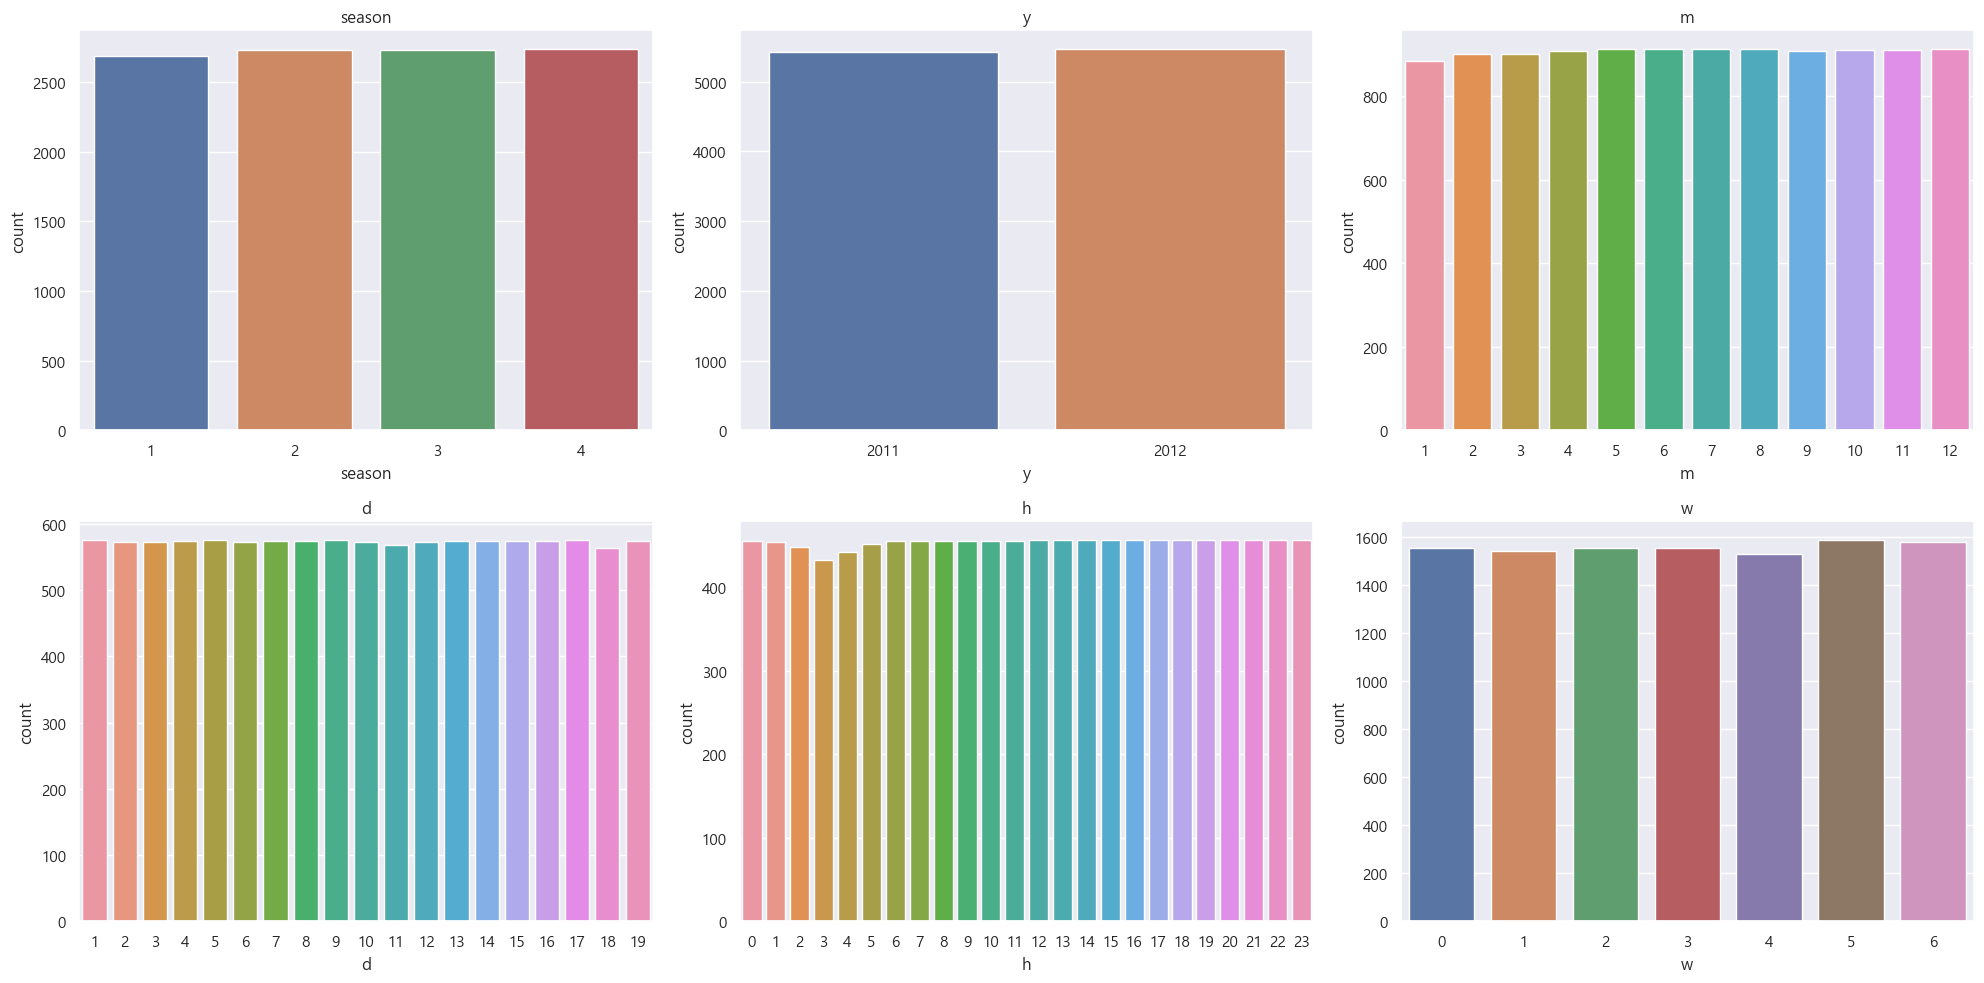

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10)  ) 

col_list = ['season', 'y', 'm', 'd','h','w']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//3
    c = i%3
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    # ---------------------------------------------------------------------------
    #sns.barplot(data=train , x=col, y="regcount", ax=axes[r][c])
    sns.countplot(data=train, x=col           , ax=axes[r][c])
    # ---------------------------------------------------------------------------
    
plt.tight_layout()
plt.show()


4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


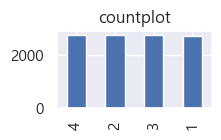

In [61]:
print(  train['season'].value_counts()  )
plt.title("countplot")
train['season'].value_counts().plot(kind="bar", figsize=(2,1))
plt.show()

## 'holiday', 'workingday'
* holiday - whether the day is considered a  <font color=red>holiday</font>
* workingday - whether the day is <font color=red>neither a weekend nor holiday</font>
<br>
<pre>
holiday  workingday
0        0  : 3163  : [0]주말
0        1  : 7412  : [1]월~금 워킹데이(공휴일이 있으면 1 0)
1        0  : 311   : [2]공휴일

In [101]:
train[['holiday', 'workingday']].value_counts().sort_index()

holiday  workingday
0        0             3163
         1             7412
1        0              311
dtype: int64

### 방법1) apply(lambda x : )

In [102]:
traincp = train.copy()
def mydef(x):  # x == df
    day_type = 0
    if   x['holiday'] == 0 and x['workingday'] == 0 :
        day_type = 0
    elif x['holiday'] == 0 and x['workingday'] == 1 :
        day_type = 1        
    elif x['holiday'] == 1 and x['workingday'] == 0 :        
        day_type = 2
    return day_type
        
    
traincp["day_type1"] = traincp.apply(lambda df : mydef(df), axis=1)
traincp[['holiday','workingday','day_type1']].value_counts().sort_index()

holiday  workingday  day_type1
0        0           0            3163
         1           1            7412
1        0           2             311
dtype: int64

In [103]:
traincp = train.copy()
def mydef(hol, work):
    day_type = 0
    if   hol == 0 and work == 0 :
        day_type = 0
    elif hol == 0 and work == 1 :
        day_type = 1        
    elif hol == 1 and work == 0 :        
        day_type = 2
    return day_type
        
# traincp["day_type1"] = traincp.apply(lambda df : mydef(df), axis=1)    
traincp["day_type2"]   = traincp.apply(lambda df : mydef(df['holiday'], df['workingday']), axis=1)
traincp[['holiday','workingday','day_type2']].value_counts().sort_index()

holiday  workingday  day_type2
0        0           0            3163
         1           1            7412
1        0           2             311
dtype: int64

### 방법2) np.where(조건식, 참, 거짓)
* decode(deptno, 10,1,    20,2   30,3    4)
* decode(deptno, 10,1,    4)

* by 규환

In [104]:
# train['day_type1'] = 
#     np.where( (train['workingday']==0)&(train['holiday']==0) , 0, 
#         np.where( (train['workingday']==1)&(train['holiday']==0) , 1, 
#              np.where( (train['workingday']==0)&(train['holiday']==1) , 2, )))

* by 석영

In [105]:
traincp['day_type3'] = 0
traincp['day_type3'] = np.where( (traincp['holiday']==0) & (traincp['workingday'] == 1),   1,  traincp['day_type3'])
traincp['day_type3'] = np.where( (traincp['holiday']==1) & (traincp['workingday'] == 0),   2,  traincp['day_type3'])
traincp[['holiday','workingday','day_type3']].value_counts().sort_index()

holiday  workingday  day_type3
0        0           0            3163
         1           1            7412
1        0           2             311
dtype: int64

### 방법3) df.loc( [idx] , 컬럼) = 변경값

In [106]:
traincp.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,w,day_type3,day_type2
regdate,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,0,0


In [109]:
idx0 = traincp[ (traincp['holiday'] == 0) & (traincp['workingday'] == 0)].index
idx1 = traincp[ (traincp['holiday'] == 0) & (traincp['workingday'] == 1)].index
idx2 = traincp[ (traincp['holiday'] == 1) & (traincp['workingday'] == 0)].index

print( len(idx0), len(idx1), len(idx2) ) 
print(idx2[:10])

# traincp.loc[ [idx값,idx값,idx값],  '컬럼' ] = 5
traincp.loc[idx0, 'day_type4'] = 0
traincp.loc[idx1, 'day_type4'] = 1
traincp.loc[idx2, 'day_type4'] = 2
traincp['day_type4'] = traincp['day_type4'].astype('int')
traincp[['holiday','workingday','day_type4']].value_counts().sort_index()

3163 7412 311
DatetimeIndex(['2011-01-17 00:00:00', '2011-01-17 01:00:00',
               '2011-01-17 02:00:00', '2011-01-17 03:00:00',
               '2011-01-17 04:00:00', '2011-01-17 05:00:00',
               '2011-01-17 06:00:00', '2011-01-17 07:00:00',
               '2011-01-17 08:00:00', '2011-01-17 09:00:00'],
              dtype='datetime64[ns]', name='regdate', freq=None)


holiday  workingday  day_type4
0        0           0            3163
         1           1            7412
1        0           2             311
dtype: int64

In [110]:
del traincp

### 원본에 적용

In [112]:
idx0 = train[ (train['holiday'] == 0) & (train['workingday'] == 0)].index
idx1 = train[ (train['holiday'] == 0) & (train['workingday'] == 1)].index
idx2 = train[ (train['holiday'] == 1) & (train['workingday'] == 0)].index

print( len(idx0), len(idx1), len(idx2) ) 
train.loc[idx0, 'day_type'] = 0
train.loc[idx1, 'day_type'] = 1
train.loc[idx2, 'day_type'] = 2

train['day_type'] = train['day_type'].astype('int')
train[['holiday','workingday','day_type']].value_counts().sort_index()

3163 7412 311


holiday  workingday  day_type
0        0           0           3163
         1           1           7412
1        0           2            311
dtype: int64

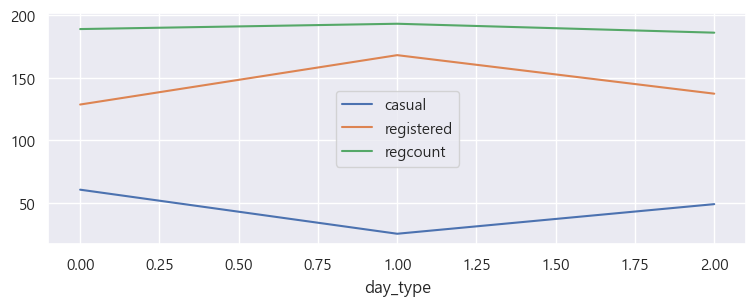

In [123]:
g = train.groupby('day_type')[['casual', 'registered', 'regcount']]
(g.sum() / g.count()).plot(figsize=(9,3))
plt.show()
# 주말 평일 공휴일

## 시간(h) 별 : 주말 평일 공휴일 대여수

### 주말

        casual  registered    regcount
h                                     
0    17.022727   80.196970   97.219697
1    13.295455   61.439394   74.734848
2    10.769231   45.553846   56.323077
3     6.568182   20.159091   26.727273
4     2.356061    6.303030    8.659091
5     1.837209    7.147287    8.984496
6     3.833333   14.295455   18.128788
7     8.674242   32.318182   40.992424
8    19.818182   80.939394  100.757576
9    45.212121  129.424242  174.636364
10   80.454545  186.628788  267.083333
11  110.848485  219.515152  330.363636
12  132.666667  252.424242  385.090909
13  146.030303  247.840909  393.871212
14  148.659091  235.750000  384.409091
15  147.159091  234.515152  381.674242
16  137.742424  235.106061  372.848485
17  118.916667  217.363636  336.280303
18   88.446970  198.651515  287.098485
19   68.575758  170.037879  238.613636
20   49.356061  130.969697  180.325758
21   37.310606  108.166667  145.477273
22   29.409091   92.166667  121.575758
23   21.196970   71.19697

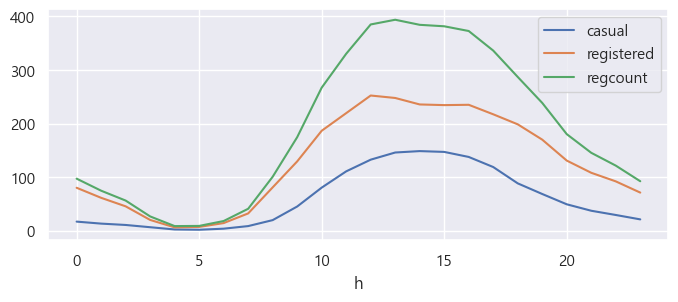

In [135]:
temp0 = train[train['day_type']==0].groupby("h")[['casual', 'registered', 'regcount']].mean()
print( temp0 )
temp0.plot(figsize=(8,3))
plt.show()

### 평일

       casual  registered    regcount
h                                    
0    7.174194   29.558065   36.732258
1    3.446602   12.556634   16.003236
2    2.101639    6.334426    8.436066
3    0.878893    4.013841    4.892734
4    0.734007    4.629630    5.363636
5    1.287097   23.241935   24.529032
6    4.280645   98.296774  102.577419
7   11.941935  278.748387  290.690323
8   22.045161  457.900000  479.945161
9   24.045161  218.248387  242.293548
10  30.209677  103.387097  133.596774
11  37.100000  119.919355  157.019355
12  40.408360  158.938907  199.347267
13  42.215434  154.945338  197.160772
14  44.681672  135.684887  180.366559
15  45.180064  153.446945  198.627010
16  47.745981  244.720257  292.466238
17  56.508039  472.700965  529.209003
18  49.414791  446.070740  495.485531
19  40.456592  308.826367  349.282958
20  30.591640  218.771704  249.363344
21  24.090032  160.765273  184.855305
22  19.266881  119.077170  138.344051
23  13.183280   75.813505   88.996785


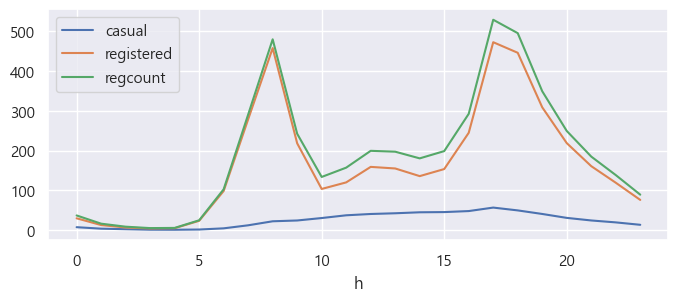

In [136]:
temp0 = train[train['day_type']==1].groupby("h")[['casual', 'registered', 'regcount']].mean()
print( temp0 )
temp0.plot(figsize=(8,3))
plt.show()

### 공휴일

        casual  registered    regcount
h                                     
0    17.000000   49.769231   66.769231
1    10.538462   32.692308   43.230769
2     9.076923   18.923077   28.000000
3     3.333333    9.083333   12.416667
4     2.230769    5.153846    7.384615
5     1.692308   11.538462   13.230769
6     4.230769   34.692308   38.923077
7     9.153846  101.846154  111.000000
8    27.076923  201.923077  229.000000
9    51.000000  160.307692  211.307692
10   76.846154  153.692308  230.538462
11   91.615385  183.230769  274.846154
12  100.615385  217.769231  318.384615
13  105.076923  221.307692  326.384615
14  108.153846  212.923077  321.076923
15   91.769231  201.000000  292.769231
16   92.846154  222.000000  314.846154
17   86.923077  281.076923  368.000000
18   73.384615  271.153846  344.538462
19   57.230769  223.000000  280.230769
20   55.461538  163.692308  219.153846
21   46.923077  134.923077  181.846154
22   33.307692  108.076923  141.384615
23   11.769231   60.69230

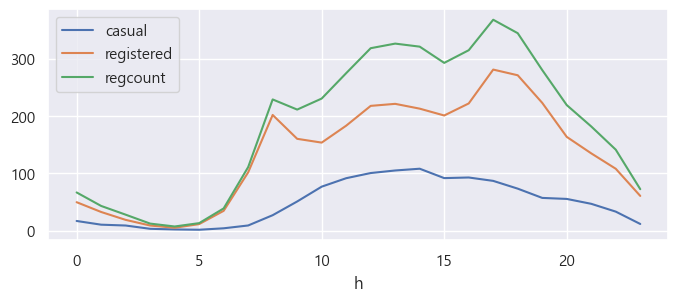

In [137]:
temp0 = train[train['day_type']==2].groupby("h")[['casual', 'registered', 'regcount']].mean()
print( temp0 )
temp0.plot(figsize=(8,3))
plt.show()

### 주말 평일 공휴일

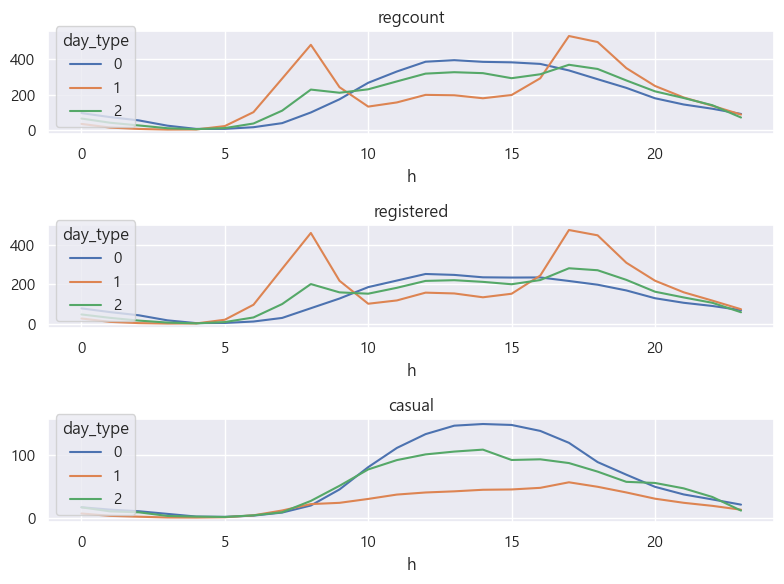

In [169]:
ax1 = plt.subplot(3,1,1)
temp = train.pivot_table(index="h", columns="day_type", values="regcount")
ax1.set_title("regcount")
temp.plot(figsize=(8,6), ax=ax1)

ax2 = plt.subplot(3,1,2)
ax2.set_title("registered")
temp = train.pivot_table(index="h", columns="day_type", values="registered")
temp.plot(figsize=(8,6), ax=ax2)

ax3 = plt.subplot(3,1,3)
ax3.set_title("casual")
temp = train.pivot_table(index="h", columns="day_type", values="casual")
temp.plot(figsize=(8,6), ax=ax3)


plt.tight_layout()
plt.show()

## 요일별(w) : 대여수

<pre>seaborn.barplot(data=None, *, x=None, y=None, hue=None,...)

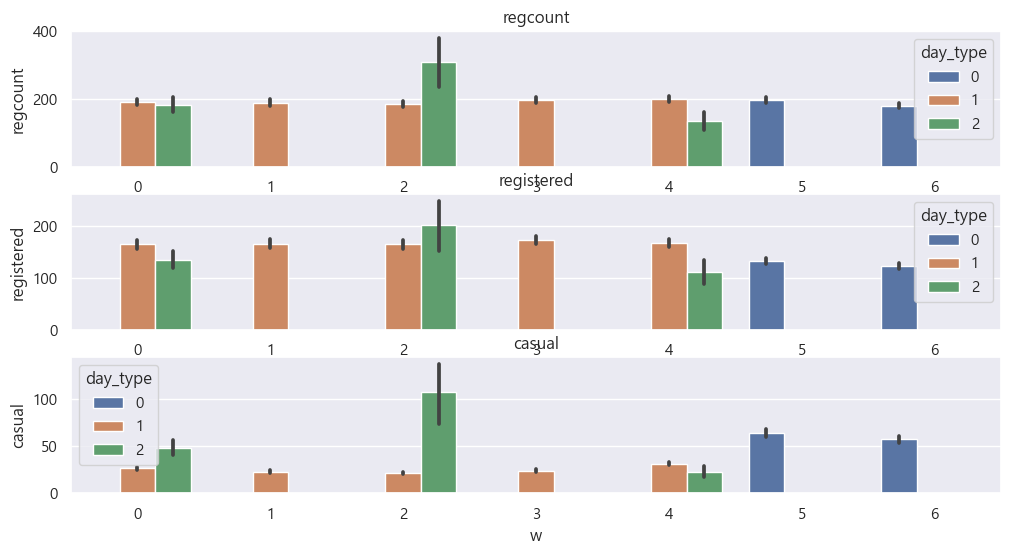

In [179]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(3,1,   1)
ax1.set_title("regcount")
sns.barplot(data=train, x="w", y="regcount", hue="day_type", ax=ax1)

ax2 = plt.subplot(3,1,   2)
ax2.set_title("registered")
sns.barplot(data=train, x="w", y="registered", hue="day_type", ax=ax2)

ax3 = plt.subplot(3,1,   3)
ax3.set_title("casual")
sns.barplot(data=train, x="w", y="casual", hue="day_type", ax=ax3)


plt.show()
# 주말(5,6)   평일 공휴일
# 월 화 ~ 토 일

In [181]:
# 공휴일 & 수요일
train[ (train['day_type']==2) & (train['w']==2)].index

DatetimeIndex(['2012-07-04 00:00:00', '2012-07-04 01:00:00',
               '2012-07-04 02:00:00', '2012-07-04 03:00:00',
               '2012-07-04 04:00:00', '2012-07-04 05:00:00',
               '2012-07-04 06:00:00', '2012-07-04 07:00:00',
               '2012-07-04 08:00:00', '2012-07-04 09:00:00',
               '2012-07-04 10:00:00', '2012-07-04 11:00:00',
               '2012-07-04 12:00:00', '2012-07-04 13:00:00',
               '2012-07-04 14:00:00', '2012-07-04 15:00:00',
               '2012-07-04 16:00:00', '2012-07-04 17:00:00',
               '2012-07-04 18:00:00', '2012-07-04 19:00:00',
               '2012-07-04 20:00:00', '2012-07-04 21:00:00',
               '2012-07-04 22:00:00', '2012-07-04 23:00:00'],
              dtype='datetime64[ns]', name='regdate', freq=None)

## 월별(m) : 대여수

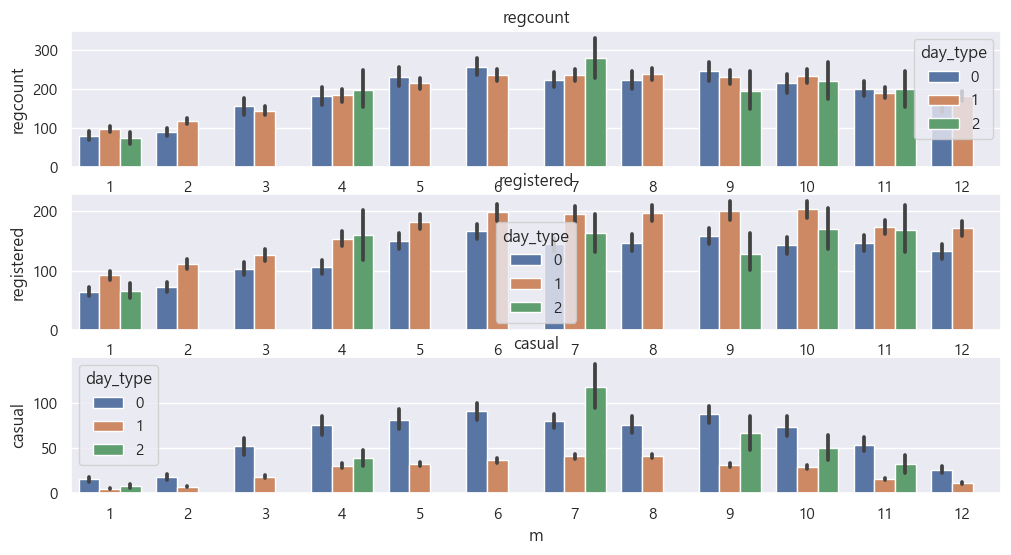

In [182]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(3,1,   1)
ax1.set_title("regcount")
sns.barplot(data=train, x="m", y="regcount", hue="day_type", ax=ax1)

ax2 = plt.subplot(3,1,   2)
ax2.set_title("registered")
sns.barplot(data=train, x="m", y="registered", hue="day_type", ax=ax2)

ax3 = plt.subplot(3,1,   3)
ax3.set_title("casual")
sns.barplot(data=train, x="m", y="casual", hue="day_type", ax=ax3)


plt.show()
# 주말(5,6)   평일 공휴일
# 월 화 ~ 토 일

## 계절성 피쳐
* 'weather', 'temp', 'atemp','humidity', 'windspeed'

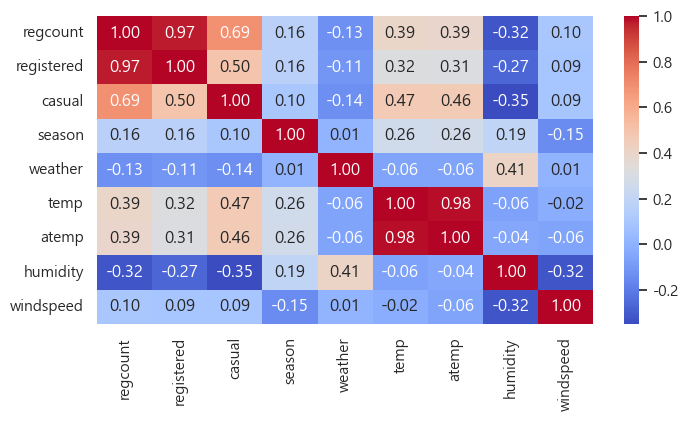

In [190]:
plt.figure(figsize=(8,4))
sns.heatmap(train[['regcount', 'registered', 'casual', 'season', 'weather', 'temp', 'atemp','humidity', 'windspeed']].corr(), fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

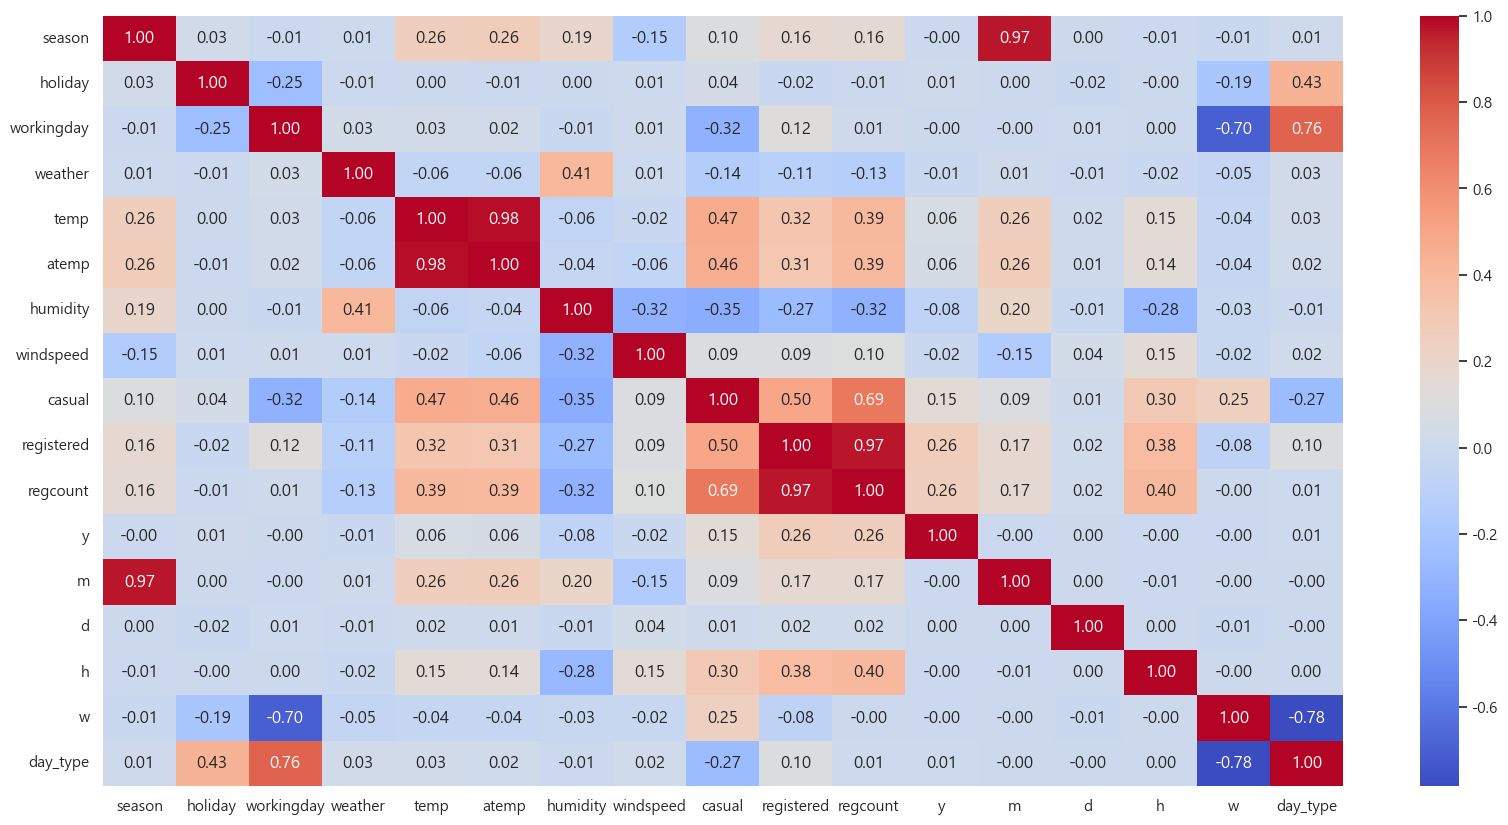

In [194]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

### 시간(h) 별 온도,습도,풍속 관계

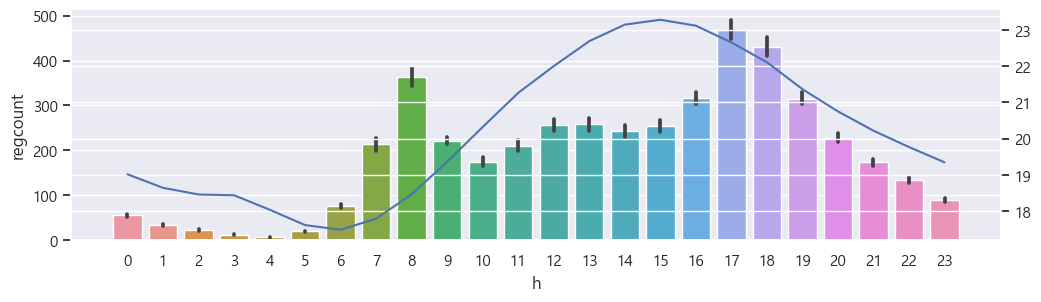

In [233]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['temp']].mean() )

plt.show()

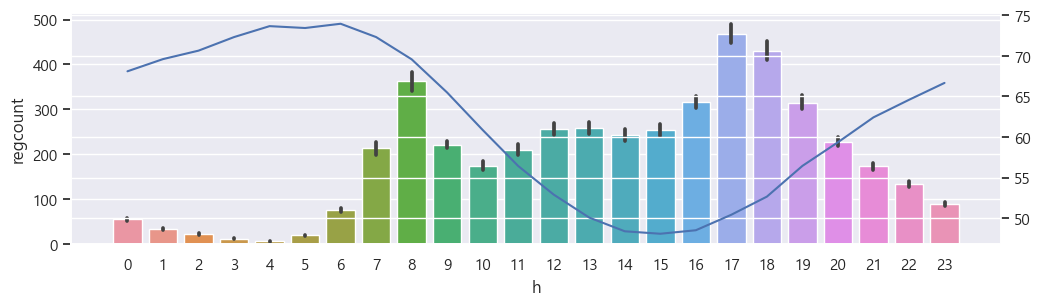

In [235]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['humidity']].mean() )

plt.show()

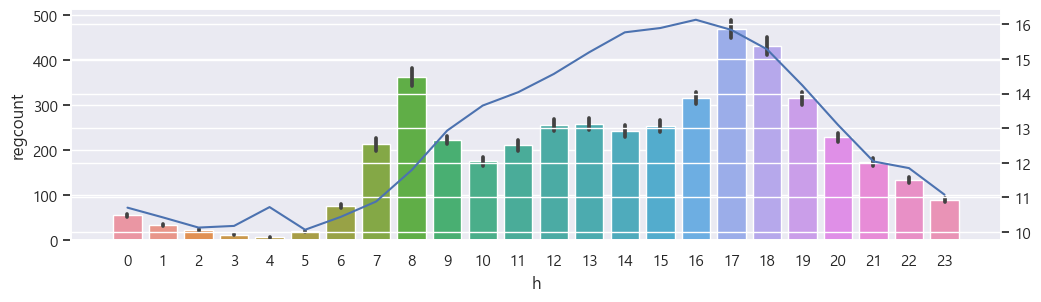

In [236]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['windspeed']].mean() )

plt.show()

### 월(m) 별 온도,습도,풍속 관계

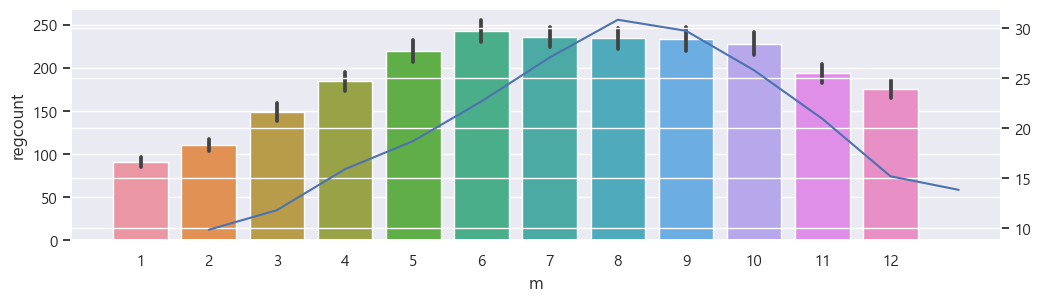

In [237]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['temp']].mean() )

plt.show()

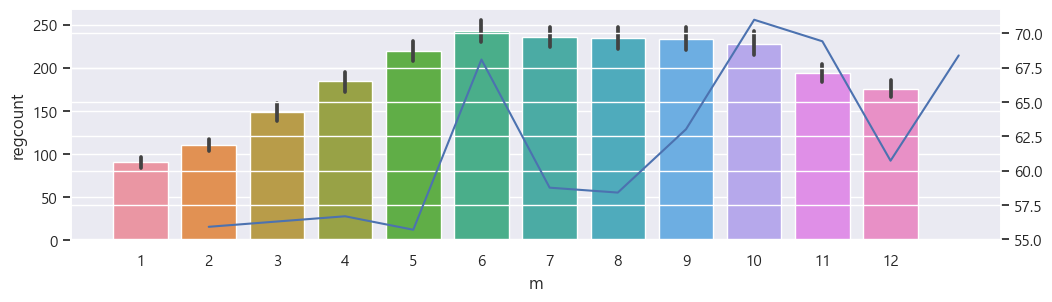

In [238]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['humidity']].mean() )

plt.show()

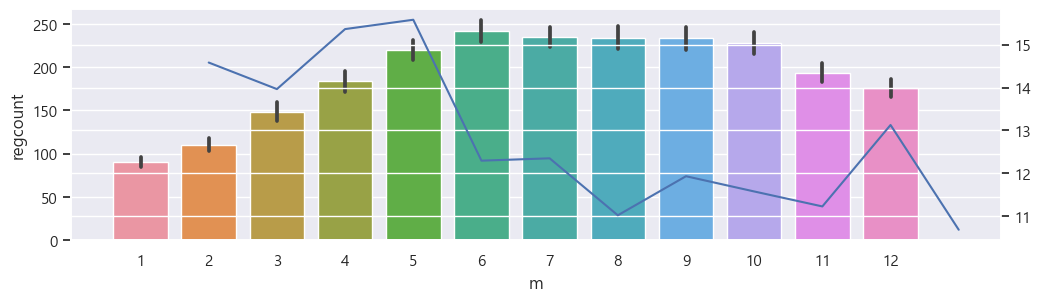

In [239]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['windspeed']].mean() )

plt.show()

### weather
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 